In [12]:
import gymnasium as gym
import numpy as np
import pickle
import matplotlib.pyplot as plt

def run(episodes, is_train=True, render=False):

    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True, render_mode="human")
    if is_train:
        q = np.zeros((env.observation_space.n, env.action_space.n))
    else:
        f = open('q_table.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    gamma = 0.9
    alpha = 0.9
    epsilon = 1
    epsilon_decay = 0.995
    rng = np.random.default_rng()
    rewards = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False

        while not terminated and not truncated:
            if is_train and rng.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state,:])
            new_state, reward, terminated, truncated,_ = env.step(action)
            if is_train:
                q[state, action] = q[state, action] + alpha * (reward + gamma * np.max(q[new_state,:]) - q[state, action])
            state = new_state
        epsilon = max(epsilon * epsilon_decay, 0)
        if (epsilon == 0):
            alpha = 0.0001
        if reward > 0:
            rewards[i] = reward
        
        
    env.close()

    sum_rewards = np.zeros(episodes)
    for i in range(episodes):
        sum_rewards[i] = np.sum(rewards[i:])
    plt.plot(sum_rewards)
    plt.savefig('sum_rewards.png')

    if is_train:
        f = open('q_table.pkl', 'wb')
        pickle.dump(q, f)
        f.close()





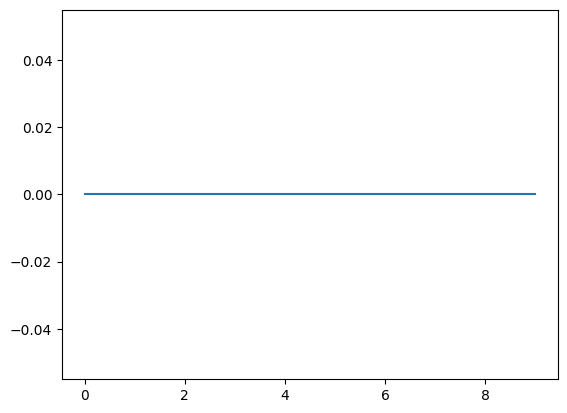

In [13]:
run(10)